<center><h1>QBUS6840 - Predictive Analytics </h1></center>

# Tutorial 4 - Time Series Decomposition I: Moving Average methods
 
### Objectives:

- Learn how to implement moving averages as smoothing techniques
- Learn how to implement moving averages as forecasting methods
- Learn how to implement weighted moving averages to smooth time series data

In the previous tutorial, we have learnt how to implement different naive forecasting methods to produce forecast values for the AirPassenger data. In this week, we will learn another set of useful methods called moving averages which can be use to smooth the time series data or to forecast. 

## 1. Load external libraries and read the AirPassenger data

Create a new Jupyter Notebook called "Tutorial_04.ipynb" and download the ***AirPassenger.csv*** file from Canvas. Let's begin our script by importing necessary libraries:

In [1]:
# Import some external libraries
import pandas as pd                # For data manipulation
import matplotlib.pyplot as plt    # For visualization
import numpy as np                 # For linear algebra

Then read the data file into a `DataFrame` object and use the `Month` column as the index of the `DataFrame` and plot the time seres data

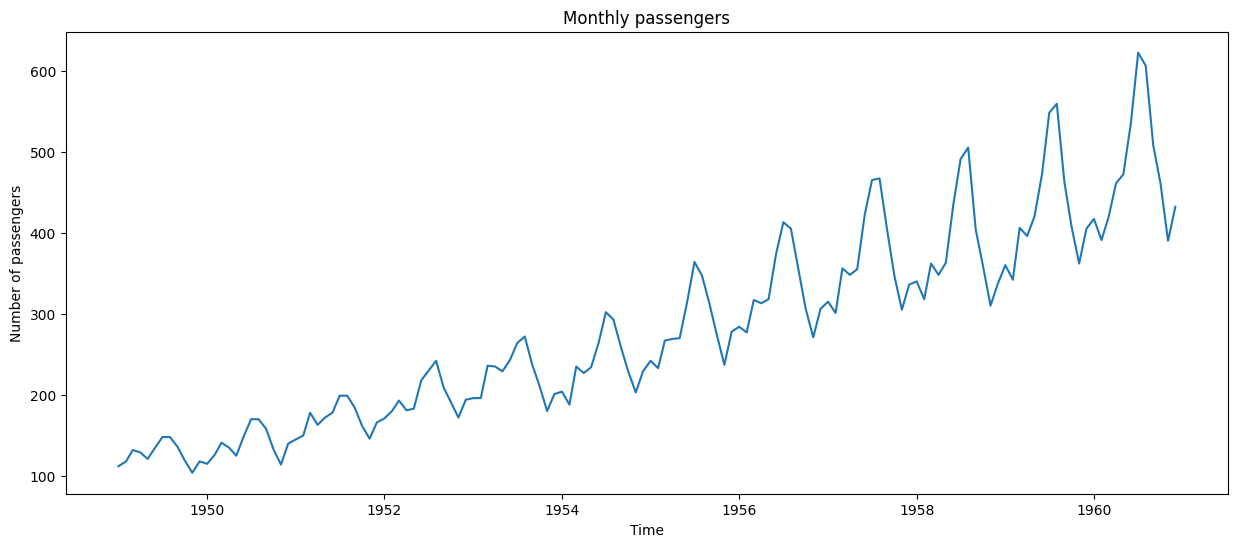

In [2]:
# Read data from a csv file
data = pd.read_csv('AirPassengers.csv')       
data['Month'] = pd.to_datetime(data['Month']) # Convert the data in the Month column to datetime
data.set_index('Month', inplace=True)         # Indexing the DataFrame by the Month column
data.head()                                   # See the first 5 rows

# Extract Passengers column
ts = data['Passengers']

# Plot number of passengers over time
plt.figure(figsize=(15,6))         
plt.plot(ts.index,ts)
plt.xlabel('Time')
plt.ylabel('Number of passengers')
plt.title('Monthly passengers')
plt.show()

## 2. Simple moving average as a smoothing technique

Simple moving average (MA) belongs to a class of ***smoothing*** techniques which are designed to reduce or eliminate short-term fluctuations, e.g. smooth out noise, and hence normally used to **reveal the trend component** of time series data. For the rest of this section, we are interested in the **symmetrically centered** MA and use the notation `CMA-k` to imply a symmetrically centered MA of order $k$ . This section will show you how implement the `CMA-k` method to smooth the AirPassenger data.

### 2.1. Implement `CMA-k` manually

Denoted by `CMA-k` a moving average of *odd* order $k$ of a given time series $Y_{1:T}=\{Y_1,...,Y_t\}$, the smoothed series can be calculated as

$$
\widehat{Y}_t = \frac{1}{k} \sum_{j=-m}^{m} Y_{t+j}, \;\;\;  m+1 \le t \le T-m
\tag{1}
$$

with $m$ a positive integer that $k=2m+1$. Here we can use `MA-k` as well since $k$ is an odd number.

**Notes:**
- The time point we start smooth is $t=m+1$, and the last time point we smooth is $t=T-m$. The smoothed data for $t=1:m$ and $t=m+1:T$ in (1) are undefined. In Python, we can assign `NaN` for these missing values. 
- A MA is said to be **centred** if the same number of observations on either side of $Y_t$, together with $Y_t$, are averaged to compute $\widehat{Y}_t$. A MA is said to be **symmetrically centred** if it is centred and
the coefficients of $Y_{t-i}$ and $Y_{t+i}$ are the same in the average
formula. As the result, the smoothed series will have the same number of missing values on both sides. 
- The CMA equation in (1) is for the case when $k$ is an odd number. See the lecture 3 for symmetrically centred moving average with even orders.

For example, the general equation in (1) can be re-interpreted for the case `CMA-3` as

$$
\tag{2}
\begin{eqnarray}
\widehat{Y}_1 &=& NaN \\
\widehat{Y}_2 &=& \frac{1}{3}(Y_1+Y_2+Y_3)\\
\widehat{Y}_3 &=& \frac{1}{3}(Y_2+Y_3+Y_4)\\
... \\
\widehat{Y}_{T-1} &=& \frac{1}{3}(Y_{T-2}+Y_{T-1}+Y_T)\\
\widehat{Y}_T &=& NaN
\end{eqnarray}
$$

Now, let's implement the `CMA-3` method in (2) using Python. We will implement the algorithm manually first and then we will use Pandas to obtain the similar result with only a single line of code. The manual implementation is important to build up your understanding about the algorithm. 

For the manual implementation of `CMA-3`, we will use a for loop to iterate through all time steps and assign the corresponding smoothed values as shown in (2). Similar to the last tutorial, it is important to carefully compare the difference between the time indices presented in the algorithm (2) and in Python.  

In [3]:
# Define the window size k, which is an odd number, and compute m
k = 3
m = int((k-1)/2)  # int() to make sure that m is an integer

# Create a series of NaN to store smoothed values (pre-allocation)
ts_smoothed = data['Passengers'].copy()


ts_smoothed[:] = np.nan

# Using a for loop to compute smoothed values at each time point
for i in np.arange(m,len(ts)-m):
    ts_smoothed[i] = ts[i-m:i+m+1].mean()

# Save the original and smoothed series in a Dataframe
data['Passenger_CMA3_manual'] = ts_smoothed
print(data.head())
print(data.tail())
#上下家自己的左邊加起來就是右邊自己的NAN

            Passengers  Passenger_CMA3_manual
Month                                        
1949-01-01         112                    NaN
1949-02-01         118             120.666667
1949-03-01         132             126.333333
1949-04-01         129             127.333333
1949-05-01         121             128.333333
            Passengers  Passenger_CMA3_manual
Month                                        
1960-08-01         606             578.666667
1960-09-01         508             525.000000
1960-10-01         461             453.000000
1960-11-01         390             427.666667
1960-12-01         432                    NaN


<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What does `copy()` mean? What happens if we don't use `copy()` when assign values for `ts_smoothed`, e.g. `ts_smoothed = data['Passengers']`?
- Compare the time steps when we start and stop smoothing the time seires shown equation (2) and in Python code. Are they similar?
- How many NaN values at the beginning and the end of the smoothed series? Can you compute the number of missing values on both sides of the `CMA-k` series with odd order $k$?

It is useful to plot the original and smoothed series together to see the effect of the smoothing algorithm

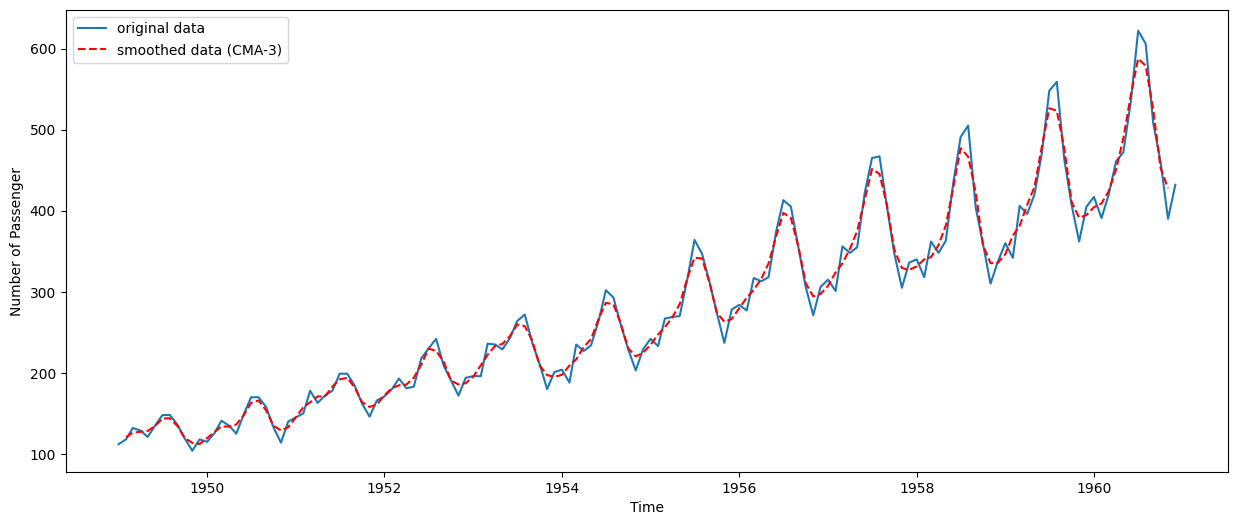

In [4]:
plt.figure(figsize=(15,6))
plt.plot(data.Passengers)
plt.plot(data.Passenger_CMA3_manual,'--r')
plt.legend(['original data','smoothed data (CMA-3)'])
plt.xlabel('Time')
plt.ylabel('Number of Passenger')
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Is the smoothed series smooth enough to reveal the trend of the original data? 
- If not, what can we do to improve the smoothness of the smoothed series? **Hint:** is $k=3$ a good value?

**Note:** The above implementation is only used for the CMA-k with k an odd number. 

### 2.1. Implement `CMA-k` using Pandas's `rolling()` method

The `rolling()` method of `Series` and `DataFrame` objects of Pandas is designed to perform a broad class of *rolling statistics* perations, including the simple moving average method discussed in the previous section. For example, the `CMA-3` operation in the previous section can be quickly implemented using `rolling()` as follows

In [5]:
# Define a rolling object with window size (MA order) 
# and then call mean() to get the average of the moving windows
ts_smoothed_rolling = ts.rolling(3,center=True).mean()
# 跟上面設定k一樣功能
# Save the original and smoothed series in a Dataframe
data['Passenger_MA3_Pandas'] = ts_smoothed_rolling
print(data.head())
print(data.tail())

            Passengers  Passenger_CMA3_manual  Passenger_MA3_Pandas
Month                                                              
1949-01-01         112                    NaN                   NaN
1949-02-01         118             120.666667            120.666667
1949-03-01         132             126.333333            126.333333
1949-04-01         129             127.333333            127.333333
1949-05-01         121             128.333333            128.333333
            Passengers  Passenger_CMA3_manual  Passenger_MA3_Pandas
Month                                                              
1960-08-01         606             578.666667            578.666667
1960-09-01         508             525.000000            525.000000
1960-10-01         461             453.000000            453.000000
1960-11-01         390             427.666667            427.666667
1960-12-01         432                    NaN                   NaN


<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Does the `rolling()` method produce the same smoothed values as shown in the previous section?
- What does `center=True` mean? What happens if we set `center=False`?
- What does `.mean()` mean? What happens if we don't add `.mean()` at the end of the `rolling()` method? 
- Let's set the window size $k=11$, how to change the above code to calculate the standard deviation of the rolling windows? **Hint:** Check the documentation of the `rolling()` method.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="docs.png"> <h3 style="padding-top: 0px;">Documentation - rolling() in Pandas </h3></div>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

If the time series exhibits seasonality with clear seasonal period $M$, then a good value for $k$ is $k=M$ (why?). For the AirPassenger data, it is quite clear that the seasonal period $M=12$ is an even number. However, it is more complicated to manually perform even order CMA, e.g. `CMA-(2k)`, than odd order CMA, e.g. `CMA-k`. Fortunately, we can use the `rolling()` method to do this challenging task in an easy way. 

To implement (symmetrical centered) MA with even orders `CMA-(2k)`, we do a two-layer MA: `MA-2k`, followed by `MA-2`, e.g.`2x4-MA`, `2x12-MA`, etc. Using Pandas `rolling()` method, it means that we have to call the `rolling().mean()` combination two times with different window size provided. We then add a `shift(-1)` operation to the final result (why?).  

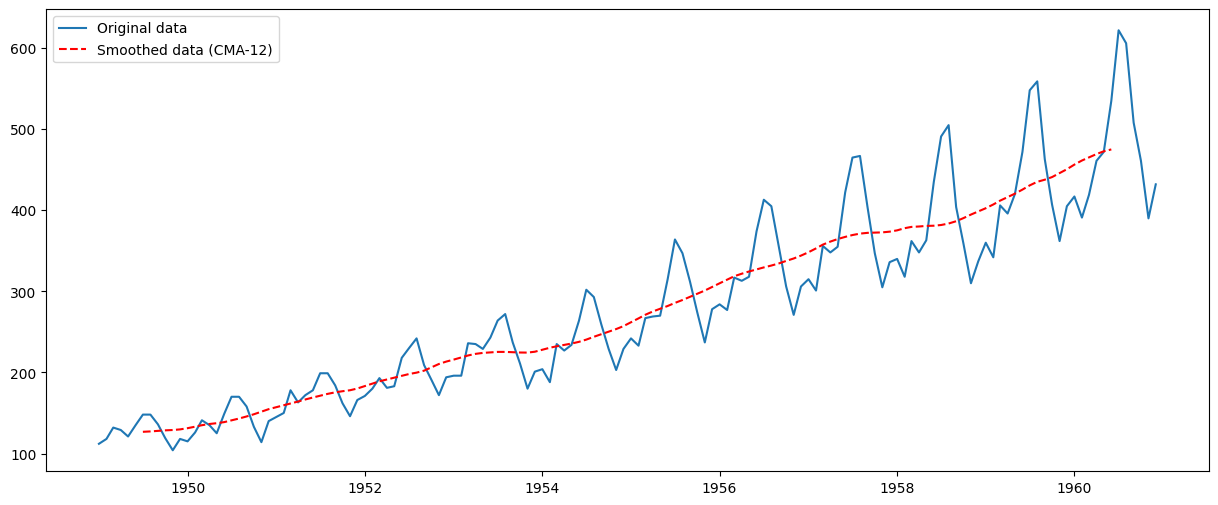

In [6]:
# Implement symmetrically centered MA with k=12 
ts_CMA12 = ts.rolling(12,center=True).mean().rolling(2,center=True).mean().shift(-1)
# 偶數就要用這個公式才可以完成


# Plot the original and smooth series
plt.figure(figsize=(15,6))
plt.plot(ts)
plt.plot(ts_CMA12,'--r')
plt.legend(['Original data','Smoothed data (CMA-12)'])
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- How many NaN values at the beginning and the end of the smoothed series `ts_CMA12`? 
- Can you compute the number of missing values on both sides of the `CMA-(2k)` series?
- Why do we add `shift(-1)` to the end of the rolling operation? What happens if we don't add `shift(-1)`?
- If $k$ is an even number, how does `rolling()` define the *center* value in the rolling windows when we set `center=True`?

## 3. Moving average as a forecasting method

The moving average methods can also be used as simple forecasting techniques. The simplest way is to use the average of the last $k$ observed data points as the *h-step-ahead* forecast value. For example, using moving average method, the one-step-ahead forecast at time $t+1$ can be calculated as

$$
\widehat{Y}_{t+1|1:t}=\frac{Y_t+Y_{t-1}+Y_{t-2}+...+Y_{t-k+1}}{k}
\tag{3}
$$

This forecasting technique using the average of the last $k$ observed values to forecast can be viewed as the general case of the simple naive method in lecture 2. The simple naive method in lecture 2 uses the most recent observed data point as the forecast value and hence equivalent to the case $k=1$ in (3).

**Note:** If we use moving average to model the trend component of the time series, then this section suggests a simple way to forecast the trend component. We will discuss this point more carefully in Tutorial 5.

The MA model in (3) can be implemented manually with a for loop. However, since we have already learnt how to use the `rolling()` method to perform rolling statistics operations, it is interesting to see how we can use `rolling()` again to produce one-step-ahead forecast values using the equation in (3). 

First, let's repeat the train/test split step we learnt in tutorial 2 with the same $T_{in}$ and $T_{out}$. We then perform the rolling mean operation without specifying `center=True` and then extract corresponding smoothed data as the forecast values. We will discuss the implementation details in the questions. 

            Passengers  Pred_one_step_MA3
Month                                    
1960-01-01         417         391.333333
1960-02-01         391         394.666667
1960-03-01         419         404.333333
1960-04-01         461         409.000000
1960-05-01         472         423.666667
1960-06-01         535         450.666667
1960-07-01         622         489.333333
1960-08-01         606         543.000000
1960-09-01         508         587.666667
1960-10-01         461         578.666667
1960-11-01         390         525.000000
1960-12-01         432         453.000000


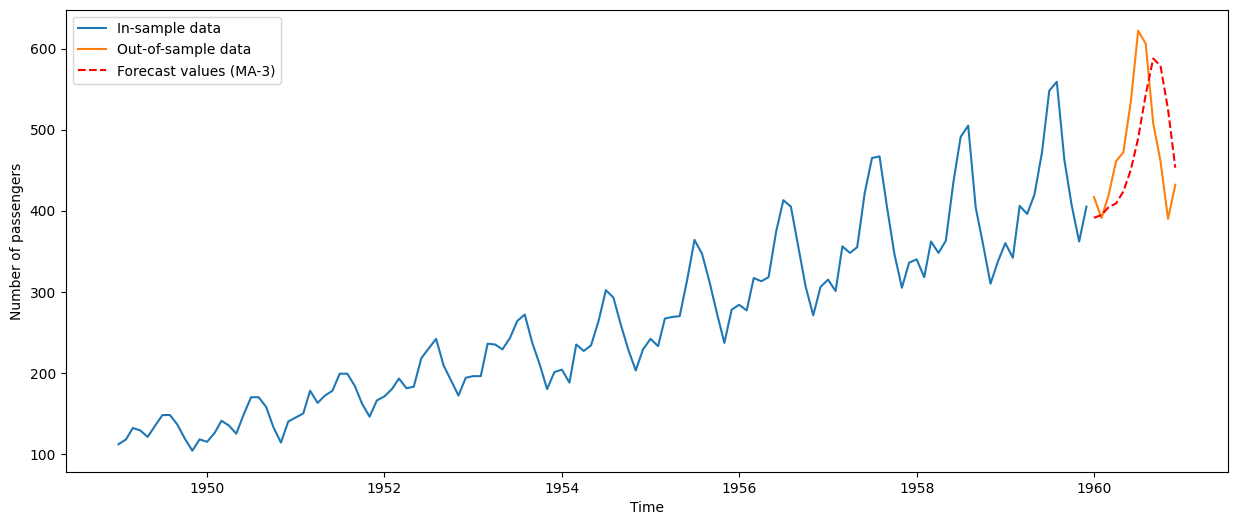

In [7]:
# Extract data for in-sample period (1949-1959)
ts_in = ts['1949':'1959']
T_in = len(ts_in) 

# Extract data for out-of-sample period (1960)
ts_out = ts['1960']
T_out = len(ts_out)

# Get the MA-3 series and then extract corresponding smoothed values to make one-step-ahead forecast
ts_rolling = ts.rolling(3).mean()
ts_one_step_MA = ts_rolling[-T_out-1:-1].to_numpy()  

# It is useful to put true and forecast for out-out-sample data in the same DataFrame
ts_forecast_df = pd.DataFrame(ts_out)
ts_forecast_df['Pred_one_step_MA3'] = ts_one_step_MA
print(ts_forecast_df)

# Then plot the original and forecast data
plt.figure(figsize=(15,6))
plt.plot(ts_in)
plt.plot(ts_out)
plt.plot(ts_forecast_df['Pred_one_step_MA3'],'--r')
plt.legend(['In-sample data','Out-of-sample data','Forecast values (MA-3)'])
plt.xlabel('Time')
plt.ylabel('Number of passengers')
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What's the difference between `ts.rolling(3,center=True).mean()` and `ts.rolling(3).mean()`?
- Can you try the following code to repeat the task? Do you get the same forecast values? Why or why not? **Hint:** See the lecture 3.

`ts_one_step_MA_new = ts.rolling(3,center=True).mean().shift(2).tail(12).to_numpy()`

## 4. Weighted moving average

The Moving Average methods in Section 2 and 3 put equal weights (when $k$ is an odd number), e.g. $\frac{1}{k}$, to all data points in each rolling window. However, it is also possible to assign different weights to adjust the contribution of individual observations to the rolling mean. For example, it is reasonable to assume that the number of passengers observed in the current month is likely to have the most significant effect to the number of passengers forecast in the next month, and hence we should put more weight to $Y_T$ to make the forecast value for $\widehat{Y}_{T+1|1:T}$. We then call this MA variant as Weighted Moving Average (WMA). Similar to the simple MA method, we can use WMA as a smoothing technique or a forecasting algorithm. In this section, we will implement `WMA-k` to smooth the AirPassenger data.   

By assigning different weights to the histortical observations, the `CMA-k` equation in (1) can be re-written to the corresponding `WMA-k` version as

$$
\widehat{Y}_t = \sum_{i=-m}^{m} w_i Y_{t+i}, \;\;\;  m+1 \le t \le T-m
\tag{4}
$$

with $  \textbf{w}=\{w_{-m},w_{-m+1},...,w_0,...,w_{m-1},w_{m}\}$ a set of weights and $\sum w_i=1$. The sum in (4) is equivalent to the dot product of two vectors with the same length $\textbf{w}$ and $Y_{-m:m}$. The dot product of two vectors can be computed quickly using the `dot()` function of numpy, e.g. `np.dot(a,b)` gives us the dot product between two vector `a` and `b`. In this example, `a` and `b` must have the same length.  

For example, let's manually smooth the AirPassenger data using `WMA-3`. The steps are very similar to the manual implementation of `CMA-3` in Section 2. The only difference is that in every iteration, we will compute the weighted sum in stead of the average of the individual observations.

**Note:** Mathematically, the average of a set of data points is a specical case of the weighted sum of those of data points, when all weights are equal. However, in this tutorial, we will use the terms `average` and `weighted sum` as two different ways of computing the rolling statistics. 

            Passengers  Passenger_CMA3_manual  Passenger_MA3_Pandas  \
Month                                                                 
1949-01-01         112                    NaN                   NaN   
1949-02-01         118             120.666667            120.666667   
1949-03-01         132             126.333333            126.333333   
1949-04-01         129             127.333333            127.333333   
1949-05-01         121             128.333333            128.333333   

            Passenger_WMA3_manual  
Month                              
1949-01-01                    NaN  
1949-02-01                  127.2  
1949-03-01                  128.5  
1949-04-01                  123.7  
1949-05-01                  131.6  
            Passengers  Passenger_CMA3_manual  Passenger_MA3_Pandas  \
Month                                                                 
1960-08-01         606             578.666667            578.666667   
1960-09-01         508             52

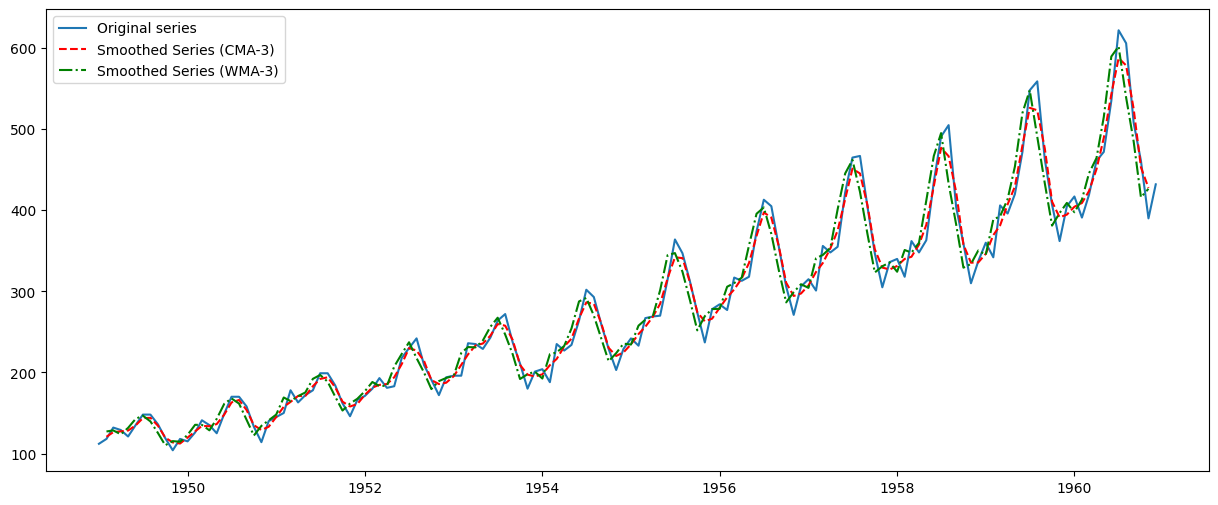

In [8]:
# Define the window size k, which is an odd number, and compute m
k = 3
m = int((k-1)/2)  # int() to make sure that m is an integer

# Define an array of weights. We will put more weight on the right-end value
w = np.array([0.1,0.2,0.7])
# 0.1 0.2 0.7 
# Create a series of NaN to store smoothed values (pre-allocation)
ts_smoothed_WMA = data['Passengers'].copy()
ts_smoothed_WMA[:] = np.nan

# Using a for loop to compute smoothed values at each time point
for i in np.arange(m,len(ts)-m):
    ts_smoothed_WMA[i] = np.dot(w,ts[i-m:i+m+1].to_numpy())

# Save the original and smoothed series in a Dataframe
data['Passenger_WMA3_manual'] = ts_smoothed_WMA
print(data.head())
print(data.tail())

# It is useful to plot the original data together with the smoothed series
plt.figure(figsize=(15,6))
plt.plot(data['Passengers'])
plt.plot(data['Passenger_CMA3_manual'],'--r')
plt.plot(data['Passenger_WMA3_manual'],'-.g')
plt.legend(['Original series','Smoothed Series (CMA-3)','Smoothed Series (WMA-3)'])
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Which smoothed series is closer to the original data? Why?
- Change the weights to $[0.7,0.2,0.1]$, can you see the difference? 

# Tasks

For this week tasks, please re-use the AirPassenger dataset.

1. Manually implement the symmetrically center CMA-12 for the AirPassenger data and compare the result when using `rolling()` method.
2. Implement the MA-3 forecasting technique in Section 3 using a for loop.  
3. Compare the forecast values produced in Section 3 to the forecast values made by the naive methods in tutorial 3. Using RMSE error as the predictive measure, which model produces the most accurate forecast?